In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('G:\DSA\Activity\Sales_add.csv')

In [3]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [4]:
data.columns=['Month','Region','Manager','Before_dm','After_dm']

In [5]:
data.head(20)

,Month,Region,Manager,Before_dm,After_dm
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [6]:
data.shape

(22, 5)

No. of observations = 22

In [7]:
data.isnull().sum()

Month        0
Region       0
Manager      0
Before_dm    0
After_dm     0
dtype: int64

No null values to be treated

In [8]:
data.describe()

,Before_dm,After_dm
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


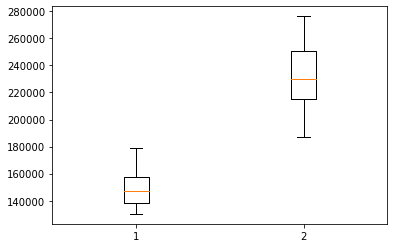

In [9]:
plt.boxplot(data[['Before_dm','After_dm']], data=data)
plt.show()

No significant Outliers in the data

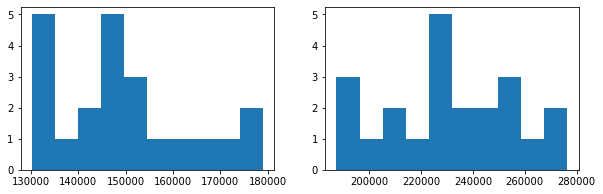

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(data.Before_dm)
plt.subplot(1,2,2)
plt.hist(data.After_dm)
plt.show()

Data Doesnt seem normally distributed

## Question 1

Null Hypothesis: Ho states that there is no increase in the sales after digital marketing was carried out.

Alternate Hypothesis: Ha states that the digital marketing has increased after adopting digital marketing

Setting Level of Significance to 5% or 0.05

In [11]:
before= data['Before_dm'].values
after=data['After_dm'].values

In [12]:
t_test_stat, p_value =stats.ttest_rel(after,before,alternative='greater')
print('t test statistic is %0.5f and P - value is % 0.5f' %(t_test_stat, p_value))
if (p_value < 0.05):
    print('\n\nP -value is less than Level of Significance')
    print('Null Hypothesis Rejected \nThe Sales has increased after the Digital Marketing')
else:
    print('\n\nP -value is not less than Level of Significance')
    print('Null Hypothesis to be accepted \nThe Sales has not increased after the Digital Marketing')

t test statistic is 12.09071 and P - value is  0.00000


P -value is less than Level of Significance
Null Hypothesis Rejected 
The Sales has increased after the Digital Marketing


## Question 2

Null Hypothesis: Ho states that there is no dependancies between Region and Manager.

Alternate Hypothesis: Ha states that there is some dependancies between Region and Manager.

Set Level of Significance to 0.05

In [13]:
data.groupby(['Region','Manager']).size()

Region      Manager    
Region - A  Manager - A    4
            Manager - B    3
            Manager - C    3
Region - B  Manager - A    4
            Manager - B    1
            Manager - C    2
Region - C  Manager - A    1
            Manager - B    3
            Manager - C    1
dtype: int64

In [14]:
cont_table=pd.crosstab(data['Manager'],data['Region'])
cont_table

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


Contingency Table

In [15]:
chi_stat,p_val,df,exp_cont=stats.chi2_contingency(cont_table)
print('\nChi2 Statistic:\n',chi_stat)
print('\n P value is:\n',p_val)
print('\n Degree of freedom is:\n',df)
print('\nExpected Contingency Values:\n', exp_cont)


Chi2 Statistic:
 3.050566893424036

 P value is:
 0.5493991051158094

 Degree of freedom is:
 4

Expected Contingency Values:
 [[4.09090909 2.86363636 2.04545455]
 [3.18181818 2.22727273 1.59090909]
 [2.72727273 1.90909091 1.36363636]]


In [16]:
if (p_val < 0.05):
    print('\n\nP -value is less than Level of Significance')
    print('Null Hypothesis Rejected \nThe There is some dependancies between Region and Manager')
else:
    print('\n\nP -value is not less than Level of Significance')
    print('Null Hypothesis to be accepted \nThere is no dependancies between Region and Manager')



P -value is not less than Level of Significance
Null Hypothesis to be accepted 
There is no dependancies between Region and Manager
